In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy.signal import find_peaks


In [197]:
#Saturation Spectroscopy
data = pd.read_csv('A0000CH1.CSV').dropna()
data.head()


,time,amplitude
0,-0.00800,-0.568
1,-0.00800,-0.568
2,-0.00799,-0.568
3,-0.00799,-0.570
4,-0.00798,-0.570


In [198]:
data.keys()

Index(['time ', 'amplitude'], dtype='object')

In [199]:
data['time ']

0      -0.00800
1      -0.00800
2      -0.00799
3      -0.00799
4      -0.00798
         ...   
3995    0.00798
3996    0.00798
3997    0.00799
3998    0.00799
3999    0.00800
Name: time , Length: 4000, dtype: float64

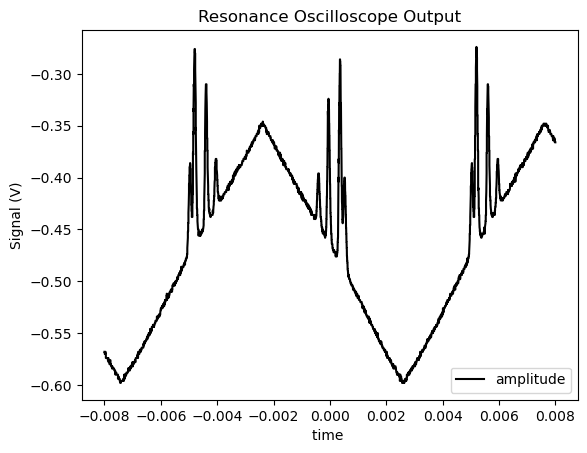

In [200]:
plot = data.plot('time ', 'amplitude', c='black')
plot.set_title('Resonance Oscilloscope Output')
plot.set_ylabel('Signal (V)')
plt.show()

In [201]:
df = data.loc[(data['time '] < 0.0015) & (data['time '] > -0.0015)]

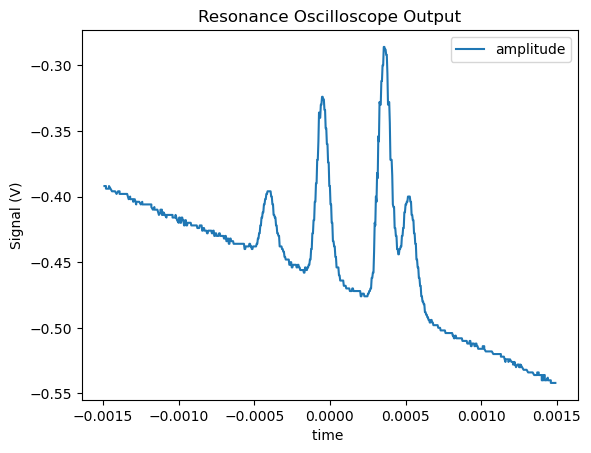

In [202]:
plot2 = df.plot('time ', 'amplitude')
plot2.set_title('Resonance Oscilloscope Output')
plot2.set_ylabel('Signal (V)')
plt.show()

In [203]:
df = df.copy()

#Removing the straight from the waveform
y1, y0 = df['amplitude'].iloc[-1], df['amplitude'].iloc[0]
x1, x0 = df['time '].iloc[-1], df['time '].iloc[0]
m= (y1-y0)/(x1-x0)

In [204]:
df.loc[:, 'Amp_shifted'] = df['amplitude'] - ((m * (df['time ']) - x0) - y1)

#flipping the waveform
df['time '] = df['time '] * -1

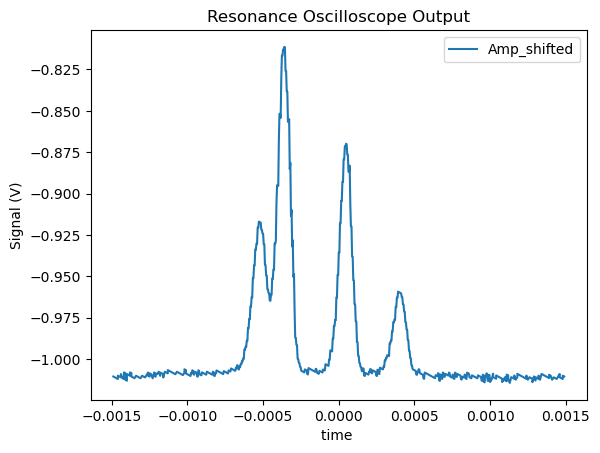

In [205]:
peak_plt= df.plot('time ', 'Amp_shifted')
peak_plt.set_title('Resonance Oscilloscope Output')
peak_plt.set_ylabel('Signal (V)')
plt.show()

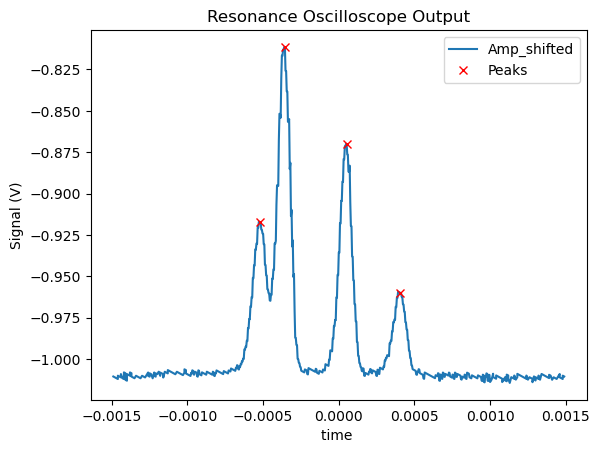

Time where the peaks occur: [ 4.04e-04  5.20e-05 -3.56e-04 -5.20e-04]


In [208]:
#find the peaks
peaks, _ = sp.signal.find_peaks(df.amplitude.values, distance = 20, prominence=0.01)

peak_plt= df.plot('time ', 'Amp_shifted')
df.iloc[peaks].plot('time ', 'Amp_shifted', color='red', style='x', ax = peak_plt, label='Peaks')
peak_plt.set_title('Resonance Oscilloscope Output')
peak_plt.set_ylabel('Signal (V)')
plt.show()

peaks_time = df.iloc[peaks]['time '].values
print(f'Time where the peaks occur: {peaks_time}')